In [2]:
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import numpy as np
from itertools import product
from tqdm import tqdm
import sys
sys.path.append('../../../src')
from models import open_pickle, filter_terms_not_in_wemodel

In [4]:
we_model_name = "sg_dim300_min100_win5"
we_vector_size = 300
we_model_dir = '../../../data/external/wiki-english/wiki-english-20171001/%s' % we_model_name

we_model = Word2Vec.load(we_model_dir+'/model.gensim')
print ('loading done!')

loading done!


In [6]:
RESULTS_FILEPATH = '../../../data/interim/association_metric_exps.pickle'
EXPERIMENT_DEFINITION_FILEPATH = '../../../data/interim/experiment_definitions.pickle'
IMAGE_SAVE_FILEPATH = '../../../reports/figures/exp_results.png'
NONRELATIVE_IMAGE_SAVE_FILEPATH = '../../../reports/figures/nonrelative_exp_results.png'

exp_def_dict = open_pickle(EXPERIMENT_DEFINITION_FILEPATH)
results_dict = open_pickle(RESULTS_FILEPATH)

In [7]:
results_dict[2]['second']

{'X_array': array([0.06205934, 0.09165296, 0.0919002 , 0.11380053, 0.09113181,
        0.11897811, 0.10779971, 0.08894435, 0.11067972, 0.14237365,
        0.09621373, 0.1135487 , 0.14185229, 0.06471875, 0.08086327,
        0.15060195, 0.12328166, 0.13162217, 0.18247157, 0.08507252,
        0.04209799, 0.12344435, 0.08338574, 0.09611011], dtype=float32),
 'Y_array': array([ 0.20805708, -0.08329672, -0.09894511,  0.01462591, -0.12913164,
        -0.04405615, -0.02649808, -0.0268372 ,  0.05020308, -0.01089379,
        -0.04618579, -0.09935915, -0.03268984, -0.01189023, -0.25332013,
        -0.15611374, -0.1442793 , -0.12644878, -0.21717617,  0.0141916 ,
        -0.12324518,  0.01065516,  0.03379461,  0.03538892], dtype=float32),
 'X_mean': 0.105608545,
 'Y_mean': -0.052643776,
 'threshold': 0.0380725,
 'pct_5': 0.006891302671283487,
 'pct_95': 0.557002368569374,
 'A_biases': array([0.5008259 , 0.3699408 , 0.22995502, 0.42247248, 0.3397562 ,
        0.36337355, 0.25808394, 0.32315367, 0.51

In [8]:
def add_axes_obj_labels(ax, exp_num, target_label, A_label, B_label):
    TITLE_FONT_SIZE = 12
    [target_label, A_label, B_label] = [s.upper() for s in [target_label, A_label, B_label]]
    ax.set_title(f'#{exp_num}: {target_label} terms: {B_label} (left) vs. {A_label} (right)',
                fontsize=TITLE_FONT_SIZE)
    ax.set_xlabel(f'Bias Value')
    ax.set_ylabel(f'Word')
    ax.yaxis.set_ticklabels([])

In [9]:
def annotate_points(ax, terms, x_array, y):
    POINT_FONT_SIZE = 9
    for i, txt in enumerate(terms):
        ax.annotate(txt, (x_array[i], y[i]), fontsize=POINT_FONT_SIZE)

In [10]:
def add_scatters_and_lines(ax, arr_first, arr_second, threshold_first, threshold_second,
                   mean_first, mean_second, pct_5_second, pct_95_second, lower_bound, upper_bound, y):
    S = 20 # Marker size
    ZERO_LINE_COLOR = 'lime'
    FIRST_ORDER_COLOR = 'black'
    SECOND_ORDER_COLOR = 'red'
    SECOND_ORDER_PERCENTILES_COLOR = 'blue'
    SHADE_DARKNESS = 0.2
    XAXIS_LIMIT = 0.6
    
    y = [i for i in range(1,len(arr_first)+1)]
    #ax.scatter(arr_first, y, c=FIRST_ORDER_COLOR, s=S)
    ax.scatter(arr_second, y, c=SECOND_ORDER_COLOR, s=S)
    ax.xaxis.grid()
    #ax.axvline(threshold_first, c=FIRST_ORDER_COLOR, linestyle='-.',label='first-order threshold')
    ax.axvline(threshold_second, color=SECOND_ORDER_COLOR, linestyle='-.', label='second-order threshold')
    #ax.axvline(-threshold_first, c=FIRST_ORDER_COLOR, linestyle='-.')
    ax.axvline(-threshold_second, color=SECOND_ORDER_COLOR, linestyle='-.')
    #ax.axvline(mean_first, c=FIRST_ORDER_COLOR, label='first-order mean')
    #ax.axvline(mean_second, c=SECOND_ORDER_COLOR, label='second-order mean')
    ax.axvspan(lower_bound, upper_bound, alpha=SHADE_DARKNESS, color=SECOND_ORDER_PERCENTILES_COLOR)
    #ax.axvspan(pct_5_second, pct_95_second, alpha=SHADE_DARKNESS, color=SECOND_ORDER_PERCENTILES_COLOR)
    #ax.axvspan(-threshold_first, threshold_first, alpha=SHADE_DARKNESS, color='black')
    ax.set_xlim(-XAXIS_LIMIT, XAXIS_LIMIT)

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

[ 0.08113076  0.18911934 -0.0954811   0.13401467  0.09897012  0.19287561
  0.11558053  0.06996465  0.12096066  0.12797187  0.11942707  0.18256408
  0.17806363  0.17999095  0.11687332  0.08817419  0.13236946  0.10520089
  0.17782208  0.09271343  0.14632878  0.13019669  0.14671066  0.15014505]
[-0.04801004 -0.06460989 -0.08932857 -0.06297787 -0.40200305 -0.1162259
  0.05139589 -0.29557508 -0.14763156  0.11352445 -0.1613886  -0.0787251
 -0.19676779 -0.14766207 -0.03967397  0.07359396 -0.04168847  0.08253389
 -0.0736915  -0.06181172  0.0839064   0.08104831  0.03454182 -0.13286161]
[0.11187551 0.1258501  0.13065556 0.13967755 0.081838   0.14567366
 0.09874853 0.13877979 0.13426414 0.1534769  0.08615439 0.12426716
 0.17107768 0.09459747 0.08219951 0.11234823 0.16962053 0.11019294
 0.19781731 0.06184731 0.08761354 0.14874938 0.0692531  0.09724578]
[ 0.1513047  -0.11470778 -0.08692707 -0.05852181 -0.24982475 -0.12160483
 -0.07806452 -0.07864259  0.06549993 -0.02181016 -0.13053733 -0.22230014
 

 20%|████████████████▌                                                                  | 4/20 [00:00<00:00, 37.84it/s]

[ 0.00949831  0.01289362 -0.03495497  0.07864296 -0.04717618  0.03105162
  0.087991    0.00934486  0.08154646  0.05047055 -0.04004431 -0.00637683
  0.02882397  0.01261252  0.00521177  0.04196131  0.17588419  0.02299881
  0.01045164  0.06420977  0.0509932   0.06016159 -0.00120395  0.03287034
  0.02991244  0.01846761  0.05329055  0.0532555   0.0128516  -0.01706126
 -0.01242021 -0.01836088  0.01844189]
[-0.00312658 -0.04479198  0.01100136 -0.01929325  0.04755099  0.11172147
  0.0910459   0.06722309  0.01470597  0.05759294  0.03760014 -0.00496487
 -0.00048456  0.03522174  0.0181483  -0.01057507  0.01824839 -0.07468432
 -0.05045044  0.02024518  0.0145905   0.0100525   0.10844399 -0.04755384
 -0.21181218  0.11745965 -0.05303171  0.04490753 -0.00095078  0.00865665
  0.01585072 -0.02373902  0.01503225]
[ 0.00663948  0.02680787  0.02791426  0.03617187  0.09599918  0.04850574
  0.07949345 -0.04863115 -0.0444735   0.03286214 -0.14850953  0.01861319
  0.0077318   0.01474978  0.00566523  0.00490594

 40%|█████████████████████████████████▏                                                 | 8/20 [00:00<00:00, 37.10it/s]

[ 0.04119465  0.05577091  0.06331062  0.01944469  0.10465929  0.10780068
  0.10657544 -0.01743984  0.03710333  0.10494243  0.08280779  0.11766191
  0.09724592  0.11059441  0.06998582  0.14013226  0.10533933]
[ 0.07358742  0.06519573  0.10762651  0.0118835   0.05736044  0.08980274
  0.05665222  0.00083162  0.04366809  0.07747671  0.05229287 -0.00498992
  0.08375244  0.16611624  0.04463285  0.01697422  0.05386306]
[-0.08004874 -0.05077918  0.01441437 -0.01782875  0.02026898 -0.04830749
  0.00148907  0.03717434]
[-0.20753585 -0.24655825 -0.16689867 -0.32195958 -0.2542526  -0.21135706
 -0.21152043 -0.20141828]


 60%|█████████████████████████████████████████████████▏                                | 12/20 [00:00<00:00, 34.97it/s]

[-0.03777    -0.01111573 -0.00301635 -0.00465037 -0.00110832 -0.0037257
 -0.00649728 -0.05348352]
[-0.14262517 -0.10875647 -0.14759968 -0.13094619 -0.16723022 -0.02748124
 -0.10132855 -0.09644441]
[-0.0169573  -0.00090333  0.00987627 -0.0253526  -0.01176235  0.00231038
 -0.03743968  0.01339002]
[-0.11513624 -0.05963063 -0.01614146 -0.11201927 -0.0795636  -0.11528738
 -0.01092793 -0.0678042 ]


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [00:00<00:00, 34.95it/s]

[-0.01844633 -0.10534403  0.00399658 -0.06343925 -0.09075728 -0.13986802]
[-0.22054353 -0.34067234 -0.4690128  -0.41603774 -0.3077197  -0.3245324 ]
[0.10225271 0.15678959 0.10749523 0.11887945 0.04136762 0.08816339
 0.07192403 0.07804854]
[0.1492859  0.16705547 0.13055772 0.07810615 0.08598709 0.04634924
 0.08980225 0.07212411]


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 35.24it/s]


Rendering...


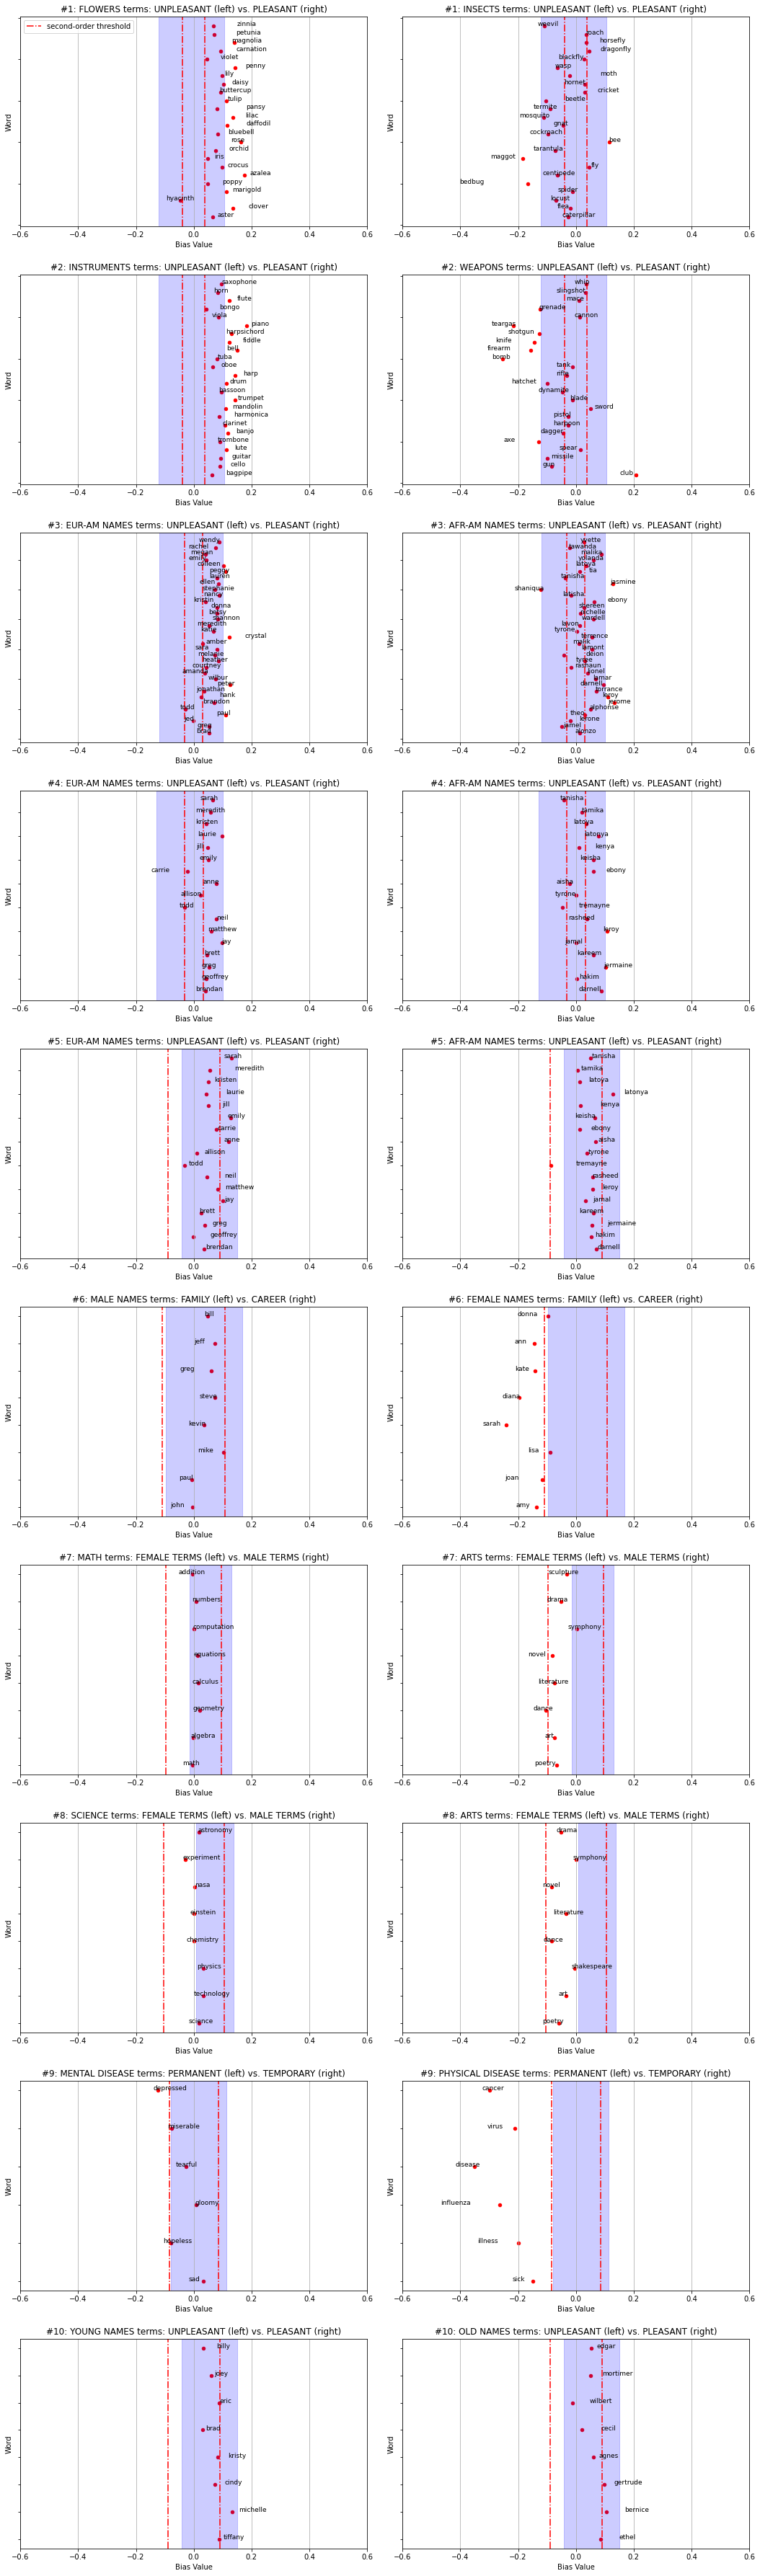

In [11]:
fig, axs = plt.subplots(10,2, figsize=(15,50))
LEGEND_SIZE = 10

exps = range(1,11)
target_letters = ['X','Y']
for exp_num, target_letter in tqdm(product(exps, target_letters), total=20):
    col = 0 if target_letter =='X' else 1
    ax = axs[exp_num-1, col]
    
    arr_first = results_dict[exp_num]['first'][f'{target_letter}_array']
    arr_second = results_dict[exp_num]['second'][f'{target_letter}_array']
    threshold_first = results_dict[exp_num]['first']['threshold']
    threshold_second = results_dict[exp_num]['second']['threshold']
    mean_first = results_dict[exp_num]['first'][f'{target_letter}_mean']
    mean_second = results_dict[exp_num]['second'][f'{target_letter}_mean']
    pct_5_second = results_dict[exp_num]['second']['pct_5']
    pct_95_second = results_dict[exp_num]['second']['pct_95']
    lower_bound = results_dict[exp_num]['second']['lower_bound']
    upper_bound = results_dict[exp_num]['second']['upper_bound']
    y = [i for i in range(1,len(arr_first)+1)]
    print(arr_first)
    
    terms = exp_def_dict[exp_num][f'{target_letter}_terms']
    target_label = exp_def_dict[exp_num][f'{target_letter}_label']
    A_label = exp_def_dict[exp_num]['A_label']
    B_label = exp_def_dict[exp_num]['B_label']
    
    
    add_scatters_and_lines(ax, arr_first, arr_second, threshold_first, threshold_second,
                    mean_first, mean_second, pct_5_second, pct_95_second, lower_bound, upper_bound, y)
    annotate_points(ax, terms, arr_first, y)
    add_axes_obj_labels(ax, exp_num, target_label, A_label, B_label)
axs[0,0].legend(loc=2, prop={'size': LEGEND_SIZE})
fig.tight_layout(pad=2)
print('Rendering...')
plt.savefig(IMAGE_SAVE_FILEPATH)
plt.show()